Here, we'll outline how to use `fasttrackpy` functions and classes either in an interactive notebook, or within your own package.

In [1]:
import IPython
from fasttrackpy import process_audio_file, \
    process_directory, \
    process_audio_textgrid
from pathlib import Path

## Function use

The easiest way to start using `fasttrackpy` directly will be by calling one of the `process_*` functions, which will either return a single [`CandidateTracks`](../reference/CandidateTracks.qmd) object, or a list of `CandidateTracks` objects.

### Process an audio file

You can process an audio file, and adjust [the relevant settings](all_arguments.qmd) with `process_audio()`.

In [2]:
audio_path = Path("..", "assets", "audio", "ay.wav")
IPython.display.Audio(audio_path)

In [3]:
candidates = process_audio_file(
    path=audio_path,
    min_max_formant=3000,
    max_max_formant=6000
    )

#### Inspecting the `candidates` object.

There are a few key attributes you can get from the [`candidates`](../reference/CandidateTracks.qmd) object, including

- The error terms for each smooth.
- The winning candidate

In [4]:
candidates.smooth_errors

array([0.16235304, 0.14485463, 0.11256701, 0.10289698, 0.04123212,
       0.02603178, 0.0234309 , 0.01443734, 0.0057591 , 0.00570674,
       0.00607839, 0.00638171, 0.02082114, 0.08069398, 0.25765617,
       0.29185815, 0.29258252, 0.40084923, 0.40984752, 0.40401117])

In [5]:
candidates.winner

A formant track object. (4, 385)

#### Inspecting the `candidates.winner` object
The [`candidates.winner`](../reference/OneTrack.qmd) object has a few useful attributes to access as well, including the maximum formant.

In [6]:
candidates.winner.maximum_formant

4421.0526315789475

#### Data output - Spectrograms
You can get a spectrogram plot out of either the [`candidates.winner`](../reference/OneTrack.qmd#fasttrackpy.OneTrack.spectrogram) or the [`candidates`](../reference/CandidateTracks.qmd#fasttrackpy.CandidateTracks.spectrograms) itself.

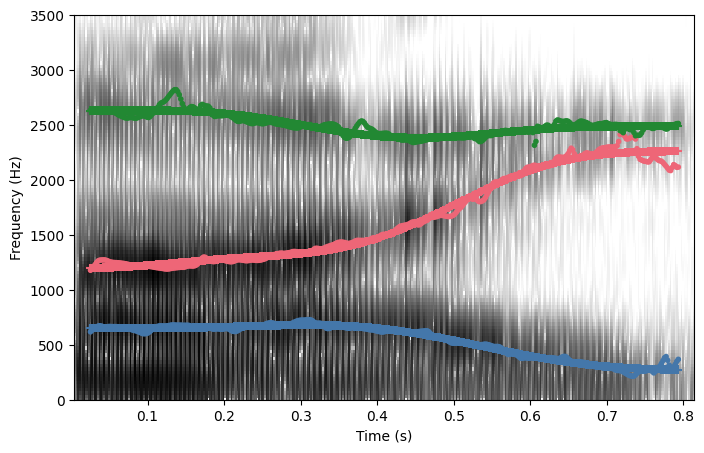

In [7]:
candidates.winner.spectrogram()

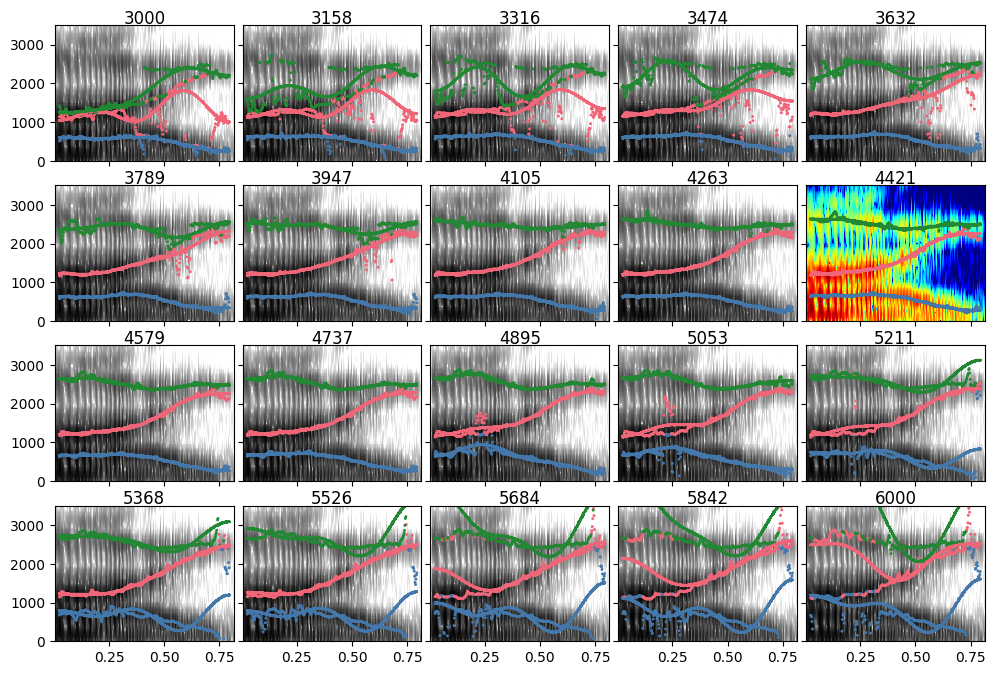

In [8]:
candidates.spectrograms()

#### Data Output - DataFrames

You can output the [`candidates`](../reference/CandidateTracks.qmd#fasttrackpy.CandidateTracks.to_df) to a [polars dataframe](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/index.html).

In [9]:
candidates.to_df(which = "winner").head()

shape: (5, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ F1        ┆ F2        ┆ F3        ┆ F1_s      ┆ … ┆ max_forma ┆ n_formant ┆ smooth_me ┆ file_nam │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ nt        ┆ ---       ┆ thod      ┆ e        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ i32       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 617.27260 ┆ 1176.9640 ┆ 2632.3317 ┆ 649.13282 ┆ … ┆ 4421.0526 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 5         ┆ 97        ┆ 56        ┆ 6         ┆   ┆ 32        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 630.42094 ┆ 1187.7655 ┆ 2629.8214 ┆ 649.13330 ┆ … ┆ 4421.0526 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 3         ┆ 44        ┆ 09        ┆ 2         ┆   ┆ 32        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 643.40050 ┆ 1205.7372 ┆ 2628.5780 ┆ 649.13473 ┆ … ┆ 4421.0526 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 8         ┆ 73        ┆ 09        ┆ 3         ┆   ┆ 32        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 654.61746 ┆ 1227.9927 ┆ 2628.5463 ┆ 649.13712 ┆ … ┆ 4421.0526 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 6         ┆ 62        ┆ 92        ┆ 8         ┆   ┆ 32        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 663.40761 ┆ 1247.9164 ┆ 2629.1639 ┆ 649.14050 ┆ … ┆ 4421.0526 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 4         ┆ 15        ┆ 65        ┆ 2         ┆   ┆ 32        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

## Processing an Audio + TextGrid combination.

To process a combination of an audio + textgrid, you can use the [`process_audio_textgrid()`](../reference/process_audio_textgrid.qmd) function. There are a few more options to add here related to textgrid processing.

### TextGrid Processing

#### `entry_classes`

`fasttrackpy` uses [`aligned-textgrid`](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/) to process TextGrids. By default, it will assume your textgrid is formatted as the output of forced alignment with a [Word](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/Word.html) and [Phone](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/Phone.html) tier. If your textgrid doesn't have these tiers, you can pass `entry_classes` [`[SequenceInterval]`](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/SequenceInterval.html) instead.

#### `target_tier`

You need to lest `process_audio_textgrid()` know which tier(s) to process, either by telling it which entry class to target (defaults to `"Phone"`) or by the name of the tier.

#### `target_labels`

To process only specific textgrid intervals (say, the vowels), you can pass `target_labels` a regex string that will match the labels of intervals.

### Running the processing

In [10]:
speaker_audio = Path("..", "assets" , "corpus", "josef-fruehwald_speaker.wav")
speaker_textgrid = Path("..", "assets", "corpus", "josef-fruehwald_speaker.TextGrid")

In [11]:
all_vowels = process_audio_textgrid(
    audio_path=speaker_audio,
    textgrid_path=speaker_textgrid,
    entry_classes=["Word", "Phone"],
    target_tier="Phone",
    # just stressed vowels
    target_labels="[AEIOU].1",
    min_duration=0.05,
    min_max_formant=3000,
    max_max_formant=6000,
    n_formants=4
)

  0%|          | 0/174 [00:00<?, ?it/s]

100%|██████████| 174/174 [00:07<00:00, 23.47it/s]


### Inspecting the results 

The `all_vowels` object is a list of [`CandidateTracks`](../reference/CandidateTracks.qmd). Each candidate track object has the same attributes [discussed above](#inspecting-the-candidates-object), but a few additional values added from the textgrid interval.

#### The `SequenceInterval` object

You can access the `aligned-textgrid.SequenceInterval` itself, and [its related attributes](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/usage/02_Sequences/00_sequence_structure.html#the-precedence-and-hierarchy-structure).

In [12]:
all_vowels[0].interval.label

'AY1'

In [13]:
all_vowels[0].interval.fol.label

'K'

In [14]:
all_vowels[0].interval.inword.label

'strikes'

#### Labels & Ids

Interval properties also get added to the `CandidateTracks` object itself, including `.label`, which contains the interval label, and `.id`, which contains a unique id for the interval within the textgrid.

In [15]:
[all_vowels[0].label,
 all_vowels[0].id]

['AY1', '0-0-4-3']

#### Outputting to a dataframe.

In order to output the results to one large dataframe. You'll have to use `polars.concat()`.

In [16]:
import polars as pl
import plotly.express as px


all_df = [vowel.to_df() for vowel in all_vowels]
big_df = pl.concat(all_df, how="diagonal")

In [21]:
#| echo: false
import plotly.io as pio
pio.renderers.default = "notebook"

In [17]:
big_df.shape

(8012, 15)

In [18]:
max_formants = big_df\
    .group_by(["id", "label"])\
    .agg(
        pl.col("max_formant").mean()
    )

In [22]:
fig = px.violin(max_formants, y = "max_formant", points="all")
fig.show()